👉 Normalization kyon zaroori hai?

Neural Network ke liye chhoti values process karna easy hota hai.

Agar hum pixel values ko 0-1 ke beech rakhein, to model fast aur accurate train hota hai.

In [1]:
import tensorflow as tf
from tensorflow import keras

# MNIST Dataset Load Karna
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Data Normalize Karna (0-255 values ko 0-1 range me convert karna)
X_train, X_test = X_train / 255.0, X_test / 255.0


👉 Kya ho raha hai?

Flatten Layer → 2D Image ko 1D vector me convert karta hai.

Dense (128 neurons, ReLU Activation) → Hidden layer features seekhti hai.

Dense (10 neurons, Softmax Activation) → Output layer digit (0-9) predict karti hai.

In [2]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Input Layer (784 neurons)
    keras.layers.Dense(128, activation='relu'),  # Hidden Layer (128 neurons)
    keras.layers.Dense(10, activation='softmax')  # Output Layer (10 neurons)
])


c:\Users\LENOVO\miniconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


👉 Kya ho raha hai?

Optimizer (Adam) → Model ko fast aur efficiently seekhne me madad karta hai. matlab weights ko update karta hai

Loss Function (Sparse Categorical Crossentropy) → Model ko batata hai ki wo kitni galti kar raha hai.

Epochs (5) → Model ko 5 baar data pe train kar raha hai taaki wo achha seekh sake.

In [3]:
# Model Compile Karna
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Train Karna
model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8795 - loss: 0.4323
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9641 - loss: 0.1230
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9762 - loss: 0.0819
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9828 - loss: 0.0571
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9861 - loss: 0.0437


👉 Kya ho raha hai?

Model new test images pe run hota hai aur accuracy check karta hai.

Agar accuracy high hai (~98%) to model achha train ho gaya.

In [4]:
# Model Accuracy Test Karna
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9719 - loss: 0.0967
Test Accuracy: 0.9739999771118164


👉 Kya ho raha hai?

Test Image ko Model me Pass Kiya

Model ne Softmax Activation se highest probability wala digit choose kiya

Image ko Show Karke Predicted Digit Print Kiya

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted Digit: 1


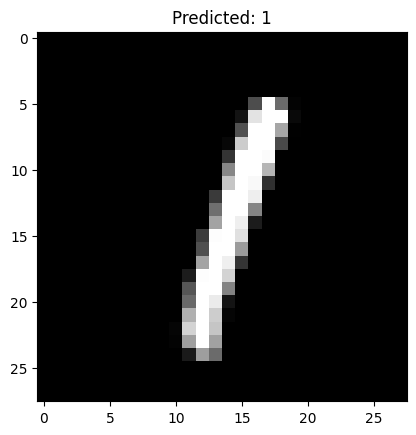

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Random Image Select Karna
image_index = 5
test_image = X_test[image_index]

# Model Prediction Karna
pred = model.predict(test_image.reshape(1, 28, 28))

# Predicted Digit
predicted_digit = np.argmax(pred)
print("Predicted Digit:", predicted_digit)

# Image Show Karna
plt.imshow(test_image, cmap='gray')
plt.title(f"Predicted: {predicted_digit}")
plt.show()


## CNN

ANN kya karta tha?

Image ko seedha flatten (ek list) bana kar dekh raha tha.

CNN kya karta hai?

Pehle image ke parts (features) jaise edges, corners, shapes ko pehchanta hai, phir use decision leta hai.

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


reshape: CNN needs a 4D shape: (samples, height, width, channels)

1 means grayscale (not colored).

/ 255.0: Normalizes pixel values from 0–255 to 0–1 for faster training.

In [7]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Reshape for CNN (add channel dimension)
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32') / 255


In [8]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


c:\Users\LENOVO\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #Best for multiclass classification
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9027 - loss: 0.3140
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9847 - loss: 0.0501
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.9898 - loss: 0.0318
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9925 - loss: 0.0220
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9949 - loss: 0.0156


In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9878 - loss: 0.0389
Test Accuracy: 0.9904000163078308
